# Outline<a class="anchor" id="outline"></a>
   [1. Background](#background)<br>
   
   [2. Data Section](#data)<br>
   - [Step 1: Import Package Dependencies](#package)<br>
   - [Step 2: Import Data](#import)<br>
   - [Step 3:Train/Test Split](#split)<br>
  
   [3. Classification Modeling](#model)
   - [SVM](#SVM)
   - [Logistic Model](#logistic)
   - [Pick a "winning" model](#pick)
   - [Careful evaluation of winning model performance measures](#evaluate)

# Background<a class="anchor" id="background">
[Go to Top](#outline)

**Target Variable:** status_delayed

**Background:** The airline has provided a list of flight delays, and through the analysis of factors such as departure time, the day of the week, and weather conditions at the time of departure for each flight, they are attempting to predict the likelihood of delays for future flights under specific circumstances.

# Data Section<a class="anchor" id="data">
[Go to Top](#outline)
> **Step 1:** Import Package Dependencies
    
> **Step 2:** Import Data
    
> **Step 3:** Train/Test Split

## Step 1: Import Package Dependencies<a class="anchor" id="package">

In [40]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score

## Step 2: Import data<a class="anchor" id="import">

In [41]:
df = pd.read_csv("FlightDelays_Clean.csv")

In [42]:
df.head()

,status_delayed,sch_dep_time,carrier_delta,carrier_us,carrier_envoy,carrier_continental,carrier_discovery,carrier_other,dest_jfk,dest_ewr,...,origin_iad,origin_bwi,bad_weather,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,0,14.92,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,14.92,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,1,14.92,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,14.92,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,14.92,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [43]:
df.columns

Index(['status_delayed', 'sch_dep_time', 'carrier_delta', 'carrier_us',
       'carrier_envoy', 'carrier_continental', 'carrier_discovery',
       'carrier_other', 'dest_jfk', 'dest_ewr', 'dest_lga', 'distance',
       'origin_dca', 'origin_iad', 'origin_bwi', 'bad_weather', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
      dtype='object')

## Step 3: Train/Test Split<a class="anchor" id="split">

In [44]:
X = df.drop(columns=['status_delayed'])
y = df['status_delayed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# Classification Modeling<a class="anchor" id="model">
[Go to Top](#outline)
### SVM
- **Step 1:** Find the best C value<br>
- **Step 2:** Train the final SVM model<br>
- **Step 3:** Table of Performance Measures<br>
    
    
### Logistic Model
- **Step 1:** Train a Logistic model
- **Step 2:** Table of Performance Measures

### Pick a "winning" model

### Careful evaluation of winning model performance measures

## SVM<a class="anchor" id="SVM">

### Step 1: Find the best C value

In [45]:
# Define the range of C values to be tested
C_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
f1_scores_class1 = []

# Loop over each value of C to train the SVM model and evaluate performance
for C in C_values:
    svm_model_loop = SVC(C=C, kernel='poly')
    svm_model_loop.fit(X_train, y_train)

    # Predictions and evaluation
    y_pred_train_loop = svm_model_loop.predict(X_train)
    y_pred_test_loop = svm_model_loop.predict(X_test)

    train_accuracies.append(accuracy_score(y_train, y_pred_train_loop))
    test_accuracies.append(accuracy_score(y_test, y_pred_test_loop))
    f1_scores_class1.append(f1_score(y_test, y_pred_test_loop, pos_label=1))

# Compile results into a DataFrame for better visualization
results_df = pd.DataFrame({
    'C_value': C_values,
    'Train_Accuracy': train_accuracies,
    'Test_Accuracy': test_accuracies,
    'F1_Score_Class1': f1_scores_class1
})

results_df

,C_value,Train_Accuracy,Test_Accuracy,F1_Score_Class1
0,0.0001,0.800649,0.816944,0.000000
1,0.0010,0.800649,0.816944,0.000000
2,0.0100,0.800649,0.816944,0.000000
3,0.1000,0.800649,0.816944,0.000000
4,1.0000,0.800649,0.816944,0.000000
5,10.0000,0.800649,0.816944,0.000000
6,100.0000,0.800649,0.816944,0.000000
7,1000.0000,0.816883,0.827534,0.109375
8,10000.0000,0.816883,0.827534,0.109375


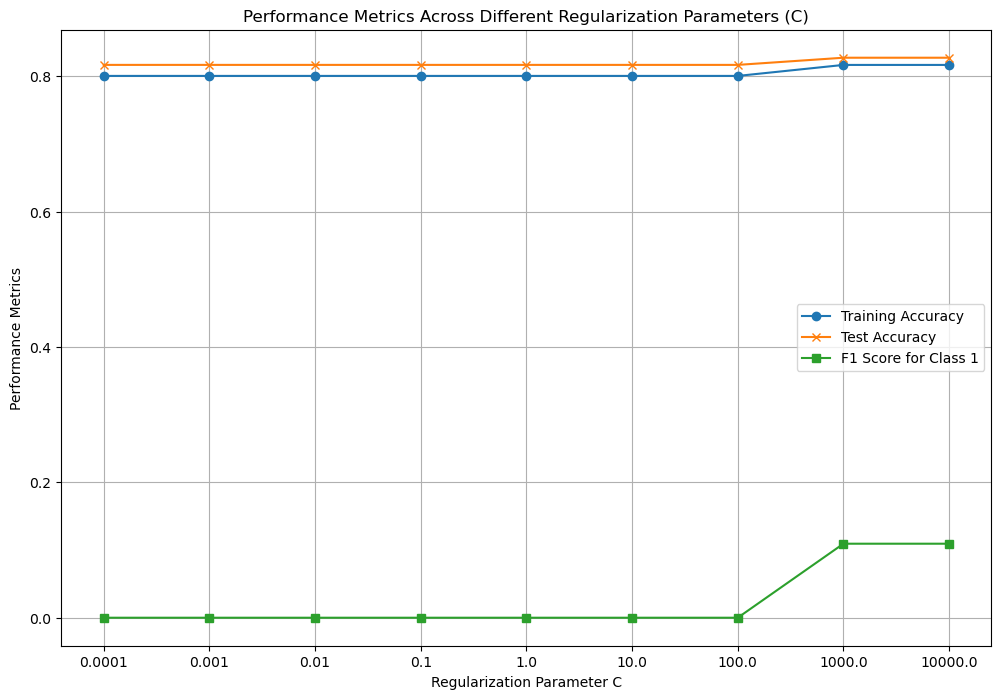

In [46]:
# Initialize the plot
plt.figure(figsize=(12, 8))

# Plotting the metrics
plt.plot(results_df['C_value'], results_df['Train_Accuracy'], marker='o', label='Training Accuracy')
plt.plot(results_df['C_value'], results_df['Test_Accuracy'], marker='x', label='Test Accuracy')
plt.plot(results_df['C_value'], results_df['F1_Score_Class1'], marker='s', label='F1 Score for Class 1')

# Annotate the plot
plt.xlabel('Regularization Parameter C')
plt.ylabel('Performance Metrics')
plt.title('Performance Metrics Across Different Regularization Parameters (C)')
plt.xscale('log')
plt.xticks(results_df['C_value'], labels=results_df['C_value'])
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

### **Conclusion:** 
Regard '1,000' as the best C value because the model has the highest performance when C value = 1,000.

## Step 2: Train the final SVM model

In [47]:
c_value = 1000

# Initialize and train the SVM model and a polynomial kernel
svm_model_poly = SVC(C=c_value, kernel='poly')
svm_model_poly.fit(X_train, y_train)

SVC(C=1000, kernel='poly')

## Step 3: Table of Performance Measures

In [48]:
svm_model_poly = SVC(C=1000, kernel='poly')
svm_model_poly.fit(X_train, y_train)

# Predictions and evaluation
y_pred_train_poly = svm_model_poly.predict(X_train)
y_pred_test_poly = svm_model_poly.predict(X_test)

train_accuracies = accuracy_score(y_train, y_pred_train_poly)
test_accuracies = accuracy_score(y_test, y_pred_test_poly)
f1_scores_class1 = f1_score(y_test, y_pred_test_poly, pos_label=1)

print(f"""
    Train_Accuracy: {train_accuracies},
    Test_Accuracy: {test_accuracies},
    F1_Score_Class1: {f1_scores_class1}""")


    Train_Accuracy: 0.8168831168831169,
    Test_Accuracy: 0.8275340393343419,
    F1_Score_Class1: 0.109375


## Logistic Model<a class="anchor" id="logistic">

## Step 1: Train a Logistic model

In [49]:
# Create a logistic regression model
logistic_model = LogisticRegression()

# Train the model on the training data
logistic_model.fit(X_train, y_train)

/Users/homerliu/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Step 2: Tabel of Performance Measures

In [50]:
# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy of Logistic Model: {accuracy}")
print(" ")
print(classification_rep)

Accuracy of Logistic Model: 0.8260211800302572
 
              precision    recall  f1-score   support

           0       0.83      1.00      0.90       540
           1       0.88      0.06      0.11       121

    accuracy                           0.83       661
   macro avg       0.85      0.53      0.51       661
weighted avg       0.83      0.83      0.76       661



## Pick a "winning" model<a class="anchor" id="pick">
> Based on the various performance measures, decide which of the two modeling frameworks (SVM or Logistic) to move forward with. 

In my opinion, **Logistic Regression model** has better performance because the f1 score of Logistic Regression is about 0.83, but the f1 score of SVM is about 0.10. As a result, I prefer the model of Logistic Regression.

## Careful evaluation of winning model performance measures<a class="anchor" id="evaluate">

### Probability Threshold

In [51]:
# Replace these with your actual predicted probabilities and true labels
predicted_probabilities = y_pred_test_poly
true_labels = y_test

# Define the range of probability thresholds
# Thresholds will range from 0 to 0.4 with an interval of 0.05
thresholds = np.arange(0, 1.01, 0.05)

# Initialize an empty DataFrame to store performance metrics
performance_df = pd.DataFrame(columns=['Threshold', 'TN', 'TP', 'FN', 'FP', 'Precision', 'Recall', 'F1', 'Accuracy'])

# Iterate over each probability threshold, calculate performance metrics, and append to the DataFrame
for threshold in thresholds:
    # Convert predicted probabilities to binary predictions using the probability threshold
    binary_predictions = (predicted_probabilities >= threshold).astype(int)
    
    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(true_labels, binary_predictions)
    
    # Extract TP, TN, FP, FN from the confusion matrix
    tn, fp, fn, tp = conf_matrix.ravel()
    
    # Calculate other performance metrics
    precision = precision_score(true_labels, binary_predictions)
    recall = recall_score(true_labels, binary_predictions)
    f1 = f1_score(true_labels, binary_predictions)
    accuracy = accuracy_score(true_labels, binary_predictions)
    
    # Append a new row to the DataFrame
    performance_df = performance_df.append({
        'Threshold': threshold,
        'TN': tn,
        'TP': tp,
        'FN': fn,
        'FP': fp,
        'Precision': precision,
        'Recall': recall,
        'F1': f1,
        'Accuracy': accuracy
    }, ignore_index=True)

/var/folders/yb/kl11tnn56n1gmm6q28_4k7sw0000gn/T/ipykernel_8158/1197643321.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({
/var/folders/yb/kl11tnn56n1gmm6q28_4k7sw0000gn/T/ipykernel_8158/1197643321.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({
/var/folders/yb/kl11tnn56n1gmm6q28_4k7sw0000gn/T/ipykernel_8158/1197643321.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({
/var/folders/yb/kl11tnn56n1gmm6q28_4k7sw0000gn/T/ipykernel_8158/1197643321.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performan

In [52]:
performance_df

,Threshold,TN,TP,FN,FP,Precision,Recall,F1,Accuracy
0,0.00,0.0,121.0,0.0,540.0,0.183056,1.000000,0.309463,0.183056
1,0.05,540.0,7.0,114.0,0.0,1.000000,0.057851,0.109375,0.827534
2,0.10,540.0,7.0,114.0,0.0,1.000000,0.057851,0.109375,0.827534
3,0.15,540.0,7.0,114.0,0.0,1.000000,0.057851,0.109375,0.827534
4,0.20,540.0,7.0,114.0,0.0,1.000000,0.057851,0.109375,0.827534
5,0.25,540.0,7.0,114.0,0.0,1.000000,0.057851,0.109375,0.827534
6,0.30,540.0,7.0,114.0,0.0,1.000000,0.057851,0.109375,0.827534
7,0.35,540.0,7.0,114.0,0.0,1.000000,0.057851,0.109375,0.827534
8,0.40,540.0,7.0,114.0,0.0,1.000000,0.057851,0.109375,0.827534
9,0.45,540.0,7.0,114.0,0.0,1.000000,0.057851,0.109375,0.827534


### Result 1: Threshold = 0.2

In [53]:
threshold_value = 0.2
threshold_df = performance_df[performance_df['Threshold'] == threshold_value]
FP = threshold_df['FP'].values[0]
FN = threshold_df['FN'].values[0]

print(f"When threshold = {threshold_value}")
print(f"There is/are {FP} false positive.")
print(f"There is/are {FN} false negaive.")

When threshold = 0.2
There is/are 0.0 false positive.
There is/are 114.0 false negaive.


### False Positive

- Meaning:<br>

> In flights without delays, the model did not make any misjudgments. In other words, the model did not classify flights without delays as delayed flights.

- Potential costs to the business<br>

> For this airline, predicting flights without delays as delayed may result in a scheduling quantity lower than the actual capacity, thus **reducing the potential maximum revenue.**

### False Negative
- Meaning<br>

> In the case of delayed flights, the predictive model incorrectly misclassified 114 samples as flights that would not be delayed.

- Potential costs to the business<br>

> For this airline, such errors could result in an excessive implantation of flights in the schedule. Adding more flights might exacerbate the delay situation, leading to a **potential decrease in customer satisfaction and impacting the airline's market share.**

### More costly prediction mistakes
- In my opinion, **false negative may be more costly** because the kind of mistake could result in a decline in the company's reputation in the market, and in severe cases, it might necessitate the payment of compensation costs.

### Result 2: Threshold = 0.25

In [38]:
threshold_value = 0.25
threshold_df = performance_df[performance_df['Threshold'] == threshold_value]
FP = threshold_df['FP'].values[0]
FN = threshold_df['FN'].values[0]

print(f"When threshold = {threshold_value}")
print(f"There is/are {FP} false positive.")
print(f"There is/are {FN} false negaive.")

When threshold = 0.25
There is/are 0.0 false positive.
There is/are 114.0 false negaive.


### False Positive

- Meaning:<br>

> In flights without delays, the model did not make any misjudgments. In other words, the model did not classify flights without delays as delayed flights.

- Potential costs to the business<br>

> For this airline, predicting flights without delays as delayed may result in a scheduling quantity lower than the actual capacity, thus **reducing the potential maximum revenue.**

### False Negative
- Meaning<br>

> In the case of delayed flights, the predictive model incorrectly misclassified 114 samples as flights that would not be delayed.

- Potential costs to the business<br>

> For this airline, such errors could result in an excessive implantation of flights in the schedule. Adding more flights might exacerbate the delay situation, leading to a **potential decrease in customer satisfaction and impacting the airline's market share.**

### More costly prediction mistakes
- In my opinion, **false negative may be more costly** because the kind of mistake could result in a decline in the company's reputation in the market, and in severe cases, it might necessitate the payment of compensation costs.

### Result 3: Threshold = 0

In [54]:
threshold_value = 0.0
threshold_df = performance_df[performance_df['Threshold'] == threshold_value]
FP = threshold_df['FP'].values[0]
FN = threshold_df['FN'].values[0]

print(f"When threshold = {threshold_value}")
print(f"There is/are {FP} false positive.")
print(f"There is/are {FN} false negaive.")

When threshold = 0.0
There is/are 540.0 false positive.
There is/are 0.0 false negaive.


### False Positive

- Meaning:<br>

> In the actual cases of non-delayed flights, the predictive model erroneously classified 540 samples as flights that would be delayed.

- Potential costs to the business<br>

> For this airline, predicting flights without delays as delayed may result in a scheduling quantity lower than the actual capacity, thus **reducing the potential maximum revenue.**

### False Negative
- Meaning<br>

> In the actual cases of delayed flights, the predictive model did not misclassify any samples as non-delayed flights.

- Potential costs to the business<br>

> For this airline, such errors could result in an excessive implantation of flights in the schedule. Adding more flights might exacerbate the delay situation, leading to a **potential decrease in customer satisfaction and impacting the airline's market share.**

### More costly prediction mistakes
- In my opinion, **false negative may be more costly** because the kind of mistake could result in a decline in the company's reputation in the market, and in severe cases, it might necessitate the payment of compensation costs.

## Recommend Probability Threshold
- In this case, I reccomend the probability threshold = 0. Because the result of FN is more costly and there is no FN when threshold = 0.